# Setting & Data Loading

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

## Train data

In [2]:
# "학습" 데이터셋이 저장된 디렉토리 경로
directory_path = "/Users/uyeongseog/Documents/상하수도 데이터(상수관로 누수 감지)/Training/누수감지데이터셋(Training)"

# 모든 CSV 파일을 읽어 하나의 데이터프레임으로 합치기
dataframes = []  # 데이터프레임을 저장할 리스트

# os.walk를 사용하여 모든 하위 디렉토리 및 파일을 순회
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".csv"):
            # 파일 경로 생성
            file_path = os.path.join(root, file)
            
            # CSV 파일 읽기
            df = pd.read_csv(file_path)
           
            # 리스트에 추가
            dataframes.append(df)

# 모든 데이터프레임을 하나로 합치기
train_df = pd.concat(dataframes, ignore_index=True)

# 결과 출력
train_df.head()


,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,16,...,4690,243,4710,284,4700,324,4670,230,4710,260
1,S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,4,...,310,423,300,711,270,412,270,531,290,538
2,S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,3,...,240,751,240,897,240,741,240,741,240,562
3,S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,2,...,370,549,360,427,370,800,370,552,370,458
4,S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,3,...,400,521,400,395,400,461,400,470,400,515


In [3]:
# train data의 IV & DV 나누기
train_df.rename(columns={"leaktype": "label"}, inplace=True)
train_df = train_df.drop(['site', 'sid', 'ldate'], axis = 1)

X_train = train_df.drop(columns=["label"])
y_train = train_df["label"]
y_train

0        out
1        out
2        out
3        out
4        out
        ... 
62559     in
62560     in
62561     in
62562     in
62563     in
Name: label, Length: 62564, dtype: object

## Test data

In [4]:
# "검증" 데이터셋이 저장된 디렉토리 경로
directory_path = "/Users/uyeongseog/Documents/상하수도 데이터(상수관로 누수 감지)/Validation/누수감지데이터셋(Validation)"

# 모든 CSV 파일을 읽어 하나의 데이터프레임으로 합치기
dataframes = []  # 데이터프레임을 저장할 리스트

# os.walk를 사용하여 모든 하위 디렉토리 및 파일을 순회
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".csv"):
            # 파일 경로 생성
            file_path = os.path.join(root, file)
            
            # CSV 파일 읽기
            df = pd.read_csv(file_path)
           
            # 리스트에 추가
            dataframes.append(df)

# 모든 데이터프레임을 하나로 합치기
test_df = pd.concat(dataframes, ignore_index=True)

# 결과 출력
test_df.head()

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-4793025022,S-0359369085873210,20210124,90,591,other,0,2,2,2,...,250,573,280,624,250,623,280,565,280,672
1,S-4677025028,S-0359369083970190,20210114,90,189,other,0,4,5,5,...,420,128,420,235,430,203,420,346,430,159
2,S-4772025022,S-0359369084117072,20200428,90,168,other,0,4,4,4,...,320,164,320,78,320,212,320,125,320,181
3,S-4573025028,S-0359369085148811,20210124,90,602,other,0,2,2,2,...,250,153,250,530,250,666,250,697,250,1027
4,S-4885025022,S-0359369085188809,20201224,90,639,other,0,13,10,13,...,320,682,320,844,320,529,320,825,320,756


In [5]:
# test data의 IV & DV 나누기
test_df = test_df.drop(['site', 'sid', 'ldate'], axis = 1)
test_df.rename(columns={"leaktype": "label"}, inplace=True)

X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]
y_test

0       other
1       other
2       other
3       other
4       other
        ...  
7815    noise
7816    noise
7817    noise
7818    noise
7819    noise
Name: label, Length: 7820, dtype: object

# EDA

In [6]:
train_df['label'].unique()

array(['out', 'other', 'normal', 'noise', 'in'], dtype=object)

In [30]:
visualize_df = y_train.value_counts().reset_index()
visualize_df

,label,count
0,normal,19704
1,out,17539
2,in,13273
3,other,7019
4,noise,5029


/var/folders/pq/1f7x2wm974vgk0qcq8kybbdm0000gn/T/ipykernel_62576/2674539211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=visualize_df, palette='viridis')


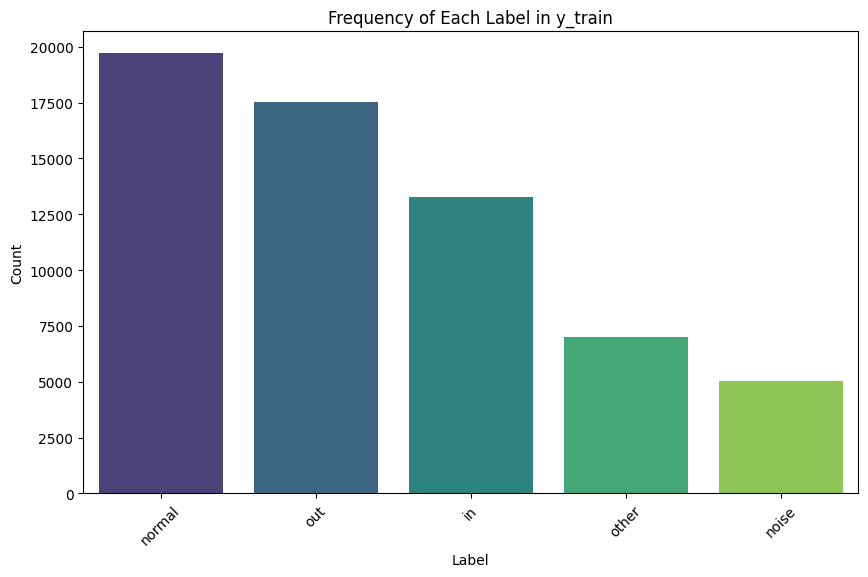

In [32]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='count', data=visualize_df, palette='viridis')
plt.title('Frequency of Each Label in y_train')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)  # 라벨명이 길 경우 겹치지 않도록 회전
plt.show()
# 라벨 별 불균형 존재 => 검증 데이터셋 활용 시 클래스 간 비율 유지 필요

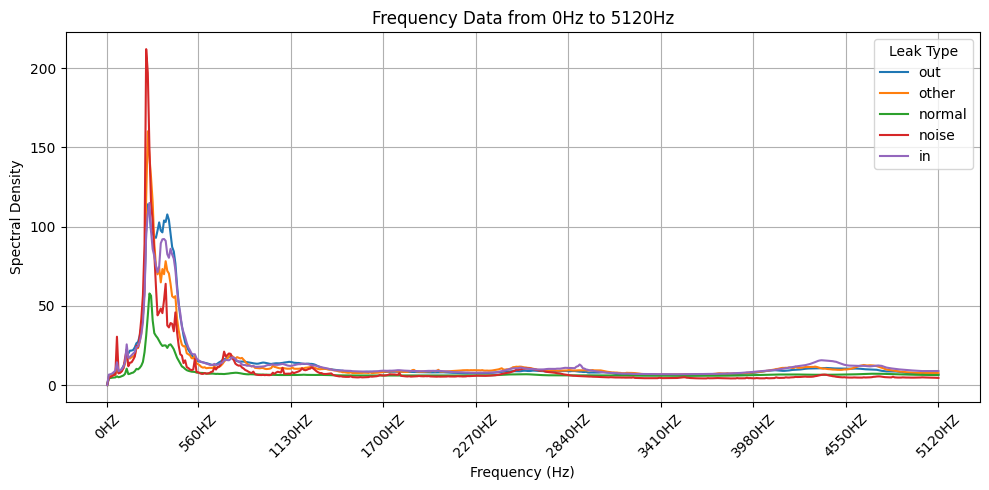

In [7]:
# Plotting Frequency Data from 10Hz to 30Hz
# Generate column names for frequencies from 0HZ to 5120HZ, assuming a step of 10HZ
frequency_columns = [f"{i}HZ" for i in range(0, 5130, 10)]

plt.figure(figsize=(10, 5))
for label in train_df['label'].unique():
    subset = train_df[train_df['label'] == label]
    mean_values = subset[frequency_columns].mean()
    plt.plot(mean_values.index, mean_values.values, label=label)

plt.title('Frequency Data from 0Hz to 5120Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Density')

# Only show some x-axis labels to avoid clutter
xticks = np.linspace(0, len(frequency_columns) - 1, num=10, dtype=int)  # 10 evenly spaced ticks
xticklabels = [frequency_columns[i] for i in xticks]  # Corresponding labels
plt.xticks(ticks=xticks, labels=xticklabels, rotation=45)  # Apply custom ticks


plt.legend(title='Leak Type')
plt.grid(True)
plt.tight_layout()
plt.show()
# 0Hz에서 모두 0으로 시작 => 확인 후 제거
# 대다수의 Hz에서는 라벨 별 큰 차이가 없음, 일부 Hz에서 큰 차이 존재
    # => 평균값 추가해서 데이터 성능 높일 필요 있음

In [8]:
for label in train_df['label'].unique():
    subset = train_df[train_df['label'] == label]
    print(f"Label: {label}, 0Hz: {subset['0HZ'].unique()}")

Label: out, 0Hz: [0]
Label: other, 0Hz: [0]
Label: normal, 0Hz: [0]
Label: noise, 0Hz: [0]
Label: in, 0Hz: [0]


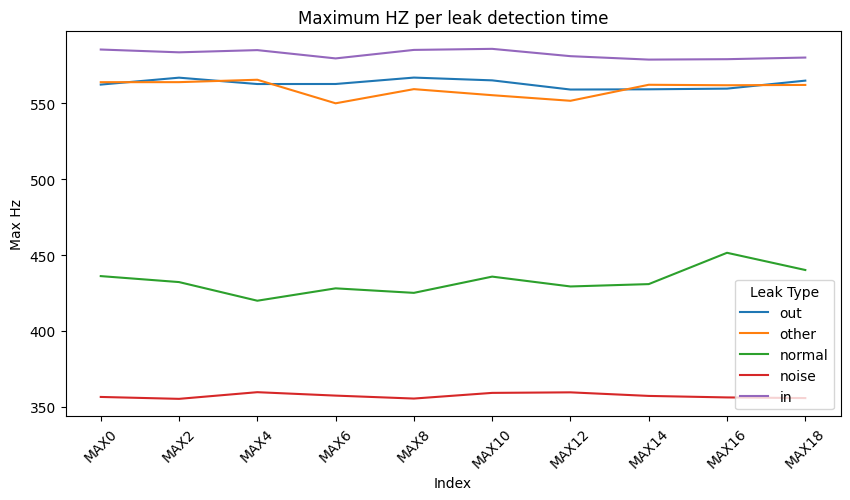

In [9]:
# max Hz
max_hz_cols = [f"MAX{i}" for i in range(0, 19, 2)]

fig, ax = plt.subplots(figsize=(10, 5))
for label in train_df['label'].unique():
    subset = train_df[train_df['label'] == label]
    ax.plot(subset[max_hz_cols].mean(), label=label)

ax.set_title('Maximum HZ per leak detection time')
ax.set_xlabel('Index')
ax.set_ylabel('Max Hz')
ax.set_xticks(range(len(max_hz_cols)))
ax.set_xticklabels(max_hz_cols, rotation=45)
ax.legend(title='Leak Type')
plt.show()
# 라벨 별 큰 차이가 없음
    # => 전체 감지된 합계값 추가해서 데이터 성능 높일 필요 있음

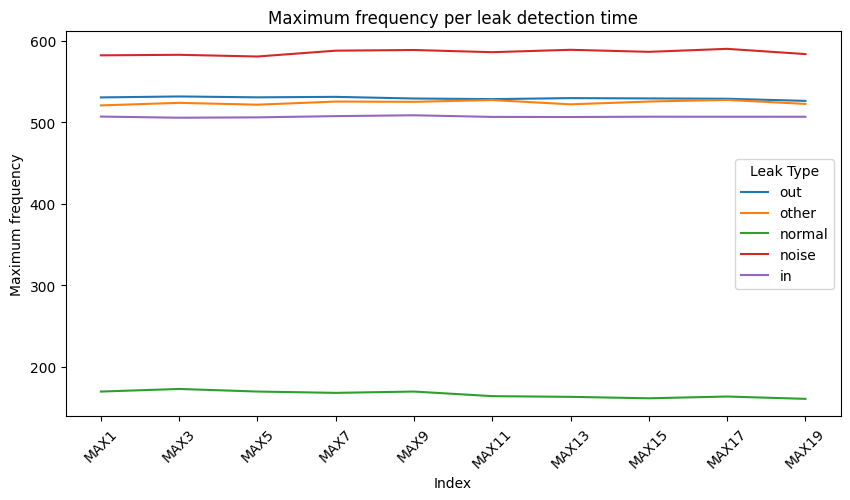

In [10]:
# max 진동수
max_amp_cols = [f"MAX{i}" for i in range(1, 20, 2)]

fig, ax = plt.subplots(figsize=(10, 5))
for label in train_df['label'].unique():
    subset = train_df[train_df['label'] == label]
    ax.plot(subset[max_amp_cols].mean(), label=label)

ax.set_title('Maximum frequency per leak detection time')
ax.set_xlabel('Index')
ax.set_ylabel('Maximum frequency')
ax.set_xticks(range(len(max_amp_cols)))
ax.set_xticklabels(max_amp_cols, rotation=45)
ax.legend(title='Leak Type')
plt.show()
# 라벨 별 큰 차이가 없음
    # => 전체 감지된 합계값 추가해서 데이터 성능 높일 필요 있음

# Data Prepreocessing

### EDA 결과에 따른 Column 삭제 혹은 추가

In [11]:
# 아무런 정보가 없는 0Hz 컬럼 삭제
train_df.drop('0HZ', axis=1, inplace=True)
test_df.drop('0HZ', axis=1, inplace=True)

In [12]:
# 학습 데이터에 적용
frequency_columns = [f"{i}HZ" for i in range(10, 5130, 10)]

# Calculate means and sums
train_df['mean_frequency'] = train_df[frequency_columns].mean(axis=1)
train_df['sum_max_hz'] = train_df[max_hz_cols].sum(axis=1)
train_df['sum_max_freq'] = train_df[max_amp_cols].sum(axis=1)

# Show the updated DataFrame
train_df.head()

,lrate,llevel,label,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,...,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19,mean_frequency,sum_max_hz,sum_max_freq
0,90,256,out,18,19,16,20,19,17,16,...,284,4700,324,4670,230,4710,260,25.496094,47020,2584
1,90,542,out,4,2,4,6,4,6,8,...,711,270,412,270,531,290,538,11.132812,2940,5465
2,90,705,out,0,0,3,3,3,3,5,...,897,240,741,240,741,240,562,8.470703,2390,7099
3,90,499,out,2,2,2,2,2,2,2,...,427,370,800,370,552,370,458,7.320312,3690,5136
4,90,423,out,3,3,3,3,3,3,3,...,395,400,461,400,470,400,515,10.455078,4080,4188


### 라벨 인코딩 & 데이터 표준화

In [13]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [14]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling & Results

### GridsearchCV를 통한 SVC 파라미터 최적화

In [40]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Define the model
model = SVC(kernel='rbf', gamma='scale')

# Define the parameter grid
param_grid = {
    'C': [10, 100, 500, 900]  # log-scale search for regularization parameter
    #'kernel': ['linear', 'rbf'],  # exploring different types of kernels
    #'gamma': ['scale', 'auto']  # log-scale search for kernel coefficient
}

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',  # scoring metric
    cv=stratified_kfold,  # StratifiedKFold 교차 검증 사용, 5-fold
    verbose=2,  # higher number gives more verbose output
    n_jobs=-1  # use all available cores
)

In [41]:
# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train_encoded)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters found
print("Best hyperparameters found were:", best_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............................................C=10; total time=27.5min
[CV] END ...............................................C=10; total time=27.7min
[CV] END ...............................................C=10; total time=27.8min
[CV] END ...............................................C=10; total time=27.9min
[CV] END ...............................................C=10; total time=28.0min
[CV] END ..............................................C=100; total time=32.0min
[CV] END ..............................................C=100; total time=32.1min
[CV] END ..............................................C=100; total time=32.5min
[CV] END ..............................................C=100; total time=37.2min
[CV] END ..............................................C=100; total time=37.5min
[CV] END ..............................................C=500; total time=44.5min
[CV] END ........................................

In [42]:
best_score = grid_search.best_score_
print(f"Best cross-validation accuracy: {best_score}")

# Optionally, print detailed cross-validation results
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"{mean_score:.3f} for {params}")

Best cross-validation accuracy: 0.8974245552669287
0.861 for {'C': 10}
0.897 for {'C': 100}
0.895 for {'C': 500}
0.891 for {'C': 900}


In [43]:
# Optionally, evaluate the best model further or use it for predictions
y_pred = best_model.predict(X_test_scaled)
print("Classification report on Test data:")
print(classification_report(y_test_encoded, y_pred))

Classification report on Test data:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1659
           1       0.76      0.77      0.76       629
           2       1.00      1.00      1.00      2462
           3       0.82      0.77      0.79       878
           4       0.87      0.90      0.88      2192

    accuracy                           0.89      7820
   macro avg       0.86      0.86      0.86      7820
weighted avg       0.89      0.89      0.89      7820



### 최적의 하이퍼파라미터 조합으로 교차 검증 및 최종 성능 보고

: GridSearchCV 2회 진행해서 최적의 조합을 찾았지만 선행연구의 조합 이상의 성능을 보이지 않음

    => 1. 선행연구의 조합으로 교차 검증 후 최적 성능 확인
    
    => 2. 최종 예측 모델로 사용 & 성능 보고

In [33]:
from sklearn.model_selection import cross_val_score

# SVM 분류기 초기화
svm_model = SVC(kernel='rbf', C=100, gamma='scale')  # 최고 성능: 선행 연구

# 교차 검증 수행 & 학습
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train_encoded, cv=5)
print("교차 검증 평균 정확도: {:.2f}%".format(np.mean(cv_scores) * 100))

svm_model.fit(X_train_scaled, y_train_encoded)

# 예측 및 모델 평가
svm_y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, svm_y_pred)
print(f'정확도: {accuracy}')
print(classification_report(y_test_encoded, svm_y_pred))

교차 검증 평균 정확도: 89.79%
정확도: 0.9037084398976982
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1659
           1       0.79      0.79      0.79       629
           2       1.00      1.00      1.00      2462
           3       0.84      0.79      0.81       878
           4       0.88      0.91      0.89      2192

    accuracy                           0.90      7820
   macro avg       0.88      0.87      0.87      7820
weighted avg       0.90      0.90      0.90      7820



In [22]:
# 선행 연구
from sklearn.model_selection import cross_val_score

# SVM 분류기 초기화
svm_model = SVC(kernel='rbf', C=800, gamma='scale')  # 선행 연구의 하이퍼파라미터

# 교차 검증 수행 & 학습
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train_encoded, cv=5)
print("교차 검증 평균 정확도: {:.2f}%".format(np.mean(cv_scores) * 100))

svm_model.fit(X_train_scaled, y_train_encoded)

# 예측 및 모델 평가
svm_y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, svm_y_pred)
print(f'정확도: {accuracy}')
print(classification_report(y_test_encoded, svm_y_pred))

교차 검증 평균 정확도: 89.56%
정확도: 0.9016624040920717
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1659
           1       0.79      0.78      0.79       629
           2       1.00      1.00      1.00      2462
           3       0.85      0.77      0.80       878
           4       0.89      0.90      0.89      2192

    accuracy                           0.90      7820
   macro avg       0.87      0.86      0.87      7820
weighted avg       0.90      0.90      0.90      7820



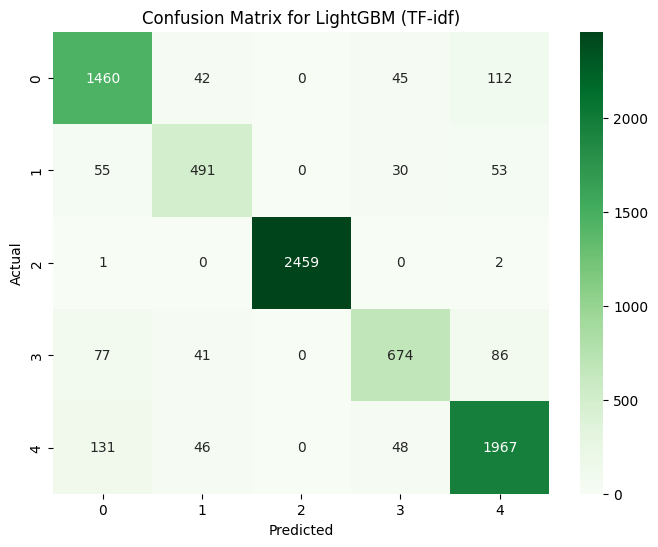

In [24]:
# confusion matric
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test_encoded, svm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix for SVC")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# xgboost

### hyperopt를 통한 베이지안 최적화 및 교차검증

In [17]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

xgb_search_space = {
    'max_depth': hp.quniform("max_depth", 3, 10, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
    'reg_alpha': hp.quniform('reg_alpha', 0, 1, 0.1),
    'reg_lambda': hp.uniform('reg_lambda', 1, 100),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
}

In [18]:
def objective(search_space):
    clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        gamma=search_space['gamma'],
        reg_alpha=search_space['reg_alpha'],
        reg_lambda=search_space['reg_lambda'],
        min_child_weight=search_space['min_child_weight'],
        subsample=search_space['subsample'],
        colsample_bytree=search_space['colsample_bytree'],
        learning_rate=search_space['learning_rate'],
        objective='multi:softmax',
        eval_metric='mlogloss',  # 'auc'에서 'mlogloss'로 변경 (다중 클래스 분류에 적합)
    )

    accuracy = cross_val_score(clf, X_train_scaled, y_train_encoded, scoring='accuracy', cv=5)
    print(f"Current params: {search_space} -> CV Accuracy: {np.mean(accuracy)}")

    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}

In [19]:
trials_val = Trials()
best_hyperparams = fmin(fn=objective,
                        space=xgb_search_space,
                        algo=tpe.suggest,
                        max_evals=100,
                        trials=trials_val)

print("The best hyperparameters are: ", "\n")
print(best_hyperparams)

Current params: {'colsample_bytree': 0.5229178143702523, 'gamma': 0.056845045020115226, 'learning_rate': 0.16025577905753444, 'max_depth': 9.0, 'min_child_weight': 5.0, 'reg_alpha': 0.8, 'reg_lambda': 95.18203213368362, 'subsample': 0.7118343319957346} -> CV Accuracy: 0.8935685032178888
Current params: {'colsample_bytree': 0.6466036332928118, 'gamma': 0.21837395864222503, 'learning_rate': 0.06882084039959067, 'max_depth': 10.0, 'min_child_weight': 5.0, 'reg_alpha': 0.1, 'reg_lambda': 99.11498798219954, 'subsample': 0.9380632381458878} -> CV Accuracy: 0.8501728677874917
Current params: {'colsample_bytree': 0.5537161738879477, 'gamma': 0.05285279653112479, 'learning_rate': 0.14013306026740927, 'max_depth': 6.0, 'min_child_weight': 3.0, 'reg_alpha': 0.5, 'reg_lambda': 40.1228874244236, 'subsample': 0.9999355805888857} -> CV Accuracy: 0.8292541620800536
Current params: {'colsample_bytree': 0.7607258290146393, 'gamma': 0.1498630003696818, 'learning_rate': 0.2416112164419854, 'max_depth': 6.

In [16]:
# 위에서 만든 X_train, y_train을 다시 쪼개서 80%는 학습용, 20%는 검증용 데이터로 분리
X_train_scaled, X_val_scaled, y_train_encoded, y_val_encoded = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, stratify=y_train_encoded)

In [20]:
# 베이지안 최적화로 구한 파라미터와 조기 중단 사용
xgb = XGBClassifier(n_estimators=400, 
                    max_depth=int(best_hyperparams['max_depth']),
                    gamma=best_hyperparams['gamma'],
                    reg_alpha=int(best_hyperparams['reg_alpha']),
                    reg_lambda=best_hyperparams['reg_lambda'],
                    min_child_weight=int(best_hyperparams['min_child_weight']),
                    subsample=best_hyperparams['subsample'],
                    colsample_bytree=best_hyperparams['colsample_bytree'],
                    learning_rate=best_hyperparams['learning_rate'],
                    objective='multi:softmax',
                    eval_metric='mlogloss',
                    early_stopping_rounds=50
                    )

evals = [(X_train_scaled, y_train_encoded), (X_val_scaled, y_val_encoded)]
xgb.fit(X_train_scaled, y_train_encoded, eval_set=evals, verbose=True)

[0]	validation_0-mlogloss:1.23610	validation_1-mlogloss:1.25113
[1]	validation_0-mlogloss:1.04401	validation_1-mlogloss:1.06817
[2]	validation_0-mlogloss:0.89672	validation_1-mlogloss:0.92932
[3]	validation_0-mlogloss:0.79468	validation_1-mlogloss:0.83514
[4]	validation_0-mlogloss:0.71757	validation_1-mlogloss:0.76413
[5]	validation_0-mlogloss:0.64651	validation_1-mlogloss:0.69983
[6]	validation_0-mlogloss:0.59466	validation_1-mlogloss:0.65231
[7]	validation_0-mlogloss:0.55402	validation_1-mlogloss:0.61509
[8]	validation_0-mlogloss:0.51777	validation_1-mlogloss:0.58245
[9]	validation_0-mlogloss:0.48989	validation_1-mlogloss:0.55833
[10]	validation_0-mlogloss:0.46426	validation_1-mlogloss:0.53630
[11]	validation_0-mlogloss:0.44331	validation_1-mlogloss:0.51784
[12]	validation_0-mlogloss:0.42405	validation_1-mlogloss:0.50040
[13]	validation_0-mlogloss:0.40481	validation_1-mlogloss:0.48374
[14]	validation_0-mlogloss:0.38886	validation_1-mlogloss:0.47077
[15]	validation_0-mlogloss:0.37417	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5014751297670141, device=None,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.15585134935622974, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2999521705560693,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [35]:
y_pred = xgb.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'정확도: {accuracy}')
print(classification_report(y_test_encoded, y_pred))

정확도: 0.9429667519181586
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1659
           1       0.91      0.86      0.88       629
           2       1.00      1.00      1.00      2462
           3       0.93      0.85      0.89       878
           4       0.91      0.96      0.93      2192

    accuracy                           0.94      7820
   macro avg       0.93      0.92      0.93      7820
weighted avg       0.94      0.94      0.94      7820



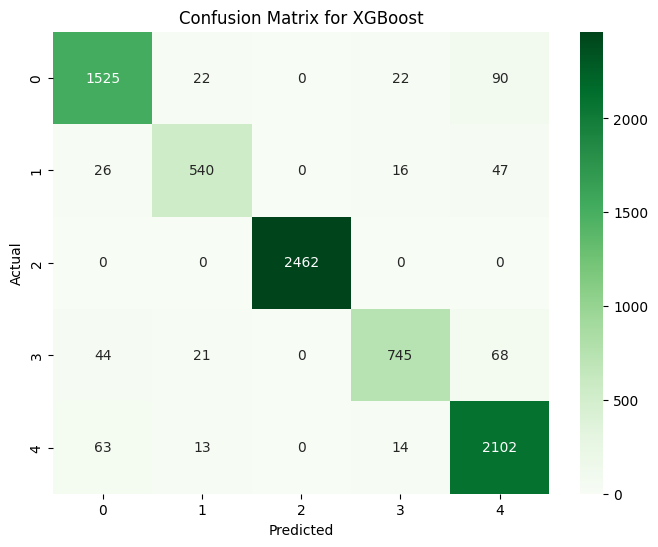

In [34]:
# confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix for XGBoost")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()